In [1]:
import uproot as uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import sys
import h5py

In [2]:
sys.path.append("/home/surajrai1900/IWCD_ParticleGun-analysis")

In [3]:
import create_file
import utils
from Classification_model import run_model

In [4]:
df = create_file.relevant_df()

/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:3

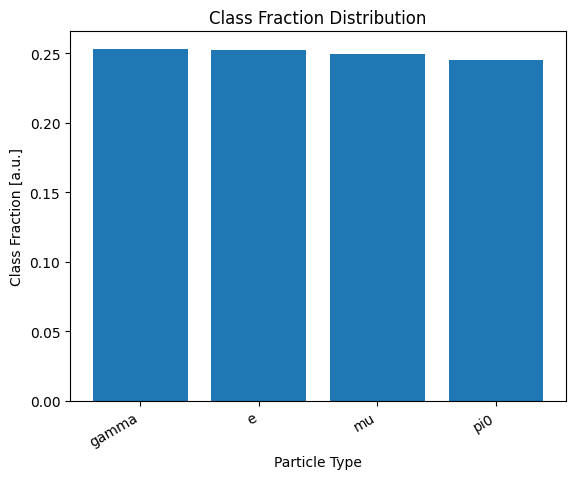

<Figure size 640x480 with 0 Axes>

In [5]:
# Plotting Class fraction for data before applying basic cuts

utils.plot_class_frac(df)

In [6]:
# Applying basic cuts to the data

df_base = df[utils.return_basic_cuts(df)]

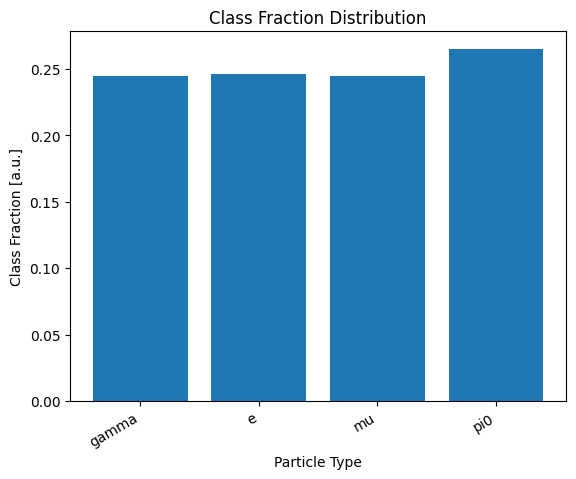

<Figure size 640x480 with 0 Axes>

In [7]:
# Plotting class fraction after applyig basic cuts

utils.plot_class_frac(df_base)

In [8]:
fq_emu_cuts = utils.return_fq_emu_cuts(df_base)
ml_emu_cuts = utils.return_ml_emu_cuts(df_base)
fq_epi0_cuts = utils.return_fq_epi0_cuts(df_base)
ml_epi0_cuts = utils.return_ml_epi0_cuts(df_base)

In [9]:
fq_cuts = ((fq_emu_cuts) & (fq_epi0_cuts))
ml_cuts = ((ml_emu_cuts) & (ml_epi0_cuts))

Using gbdt model


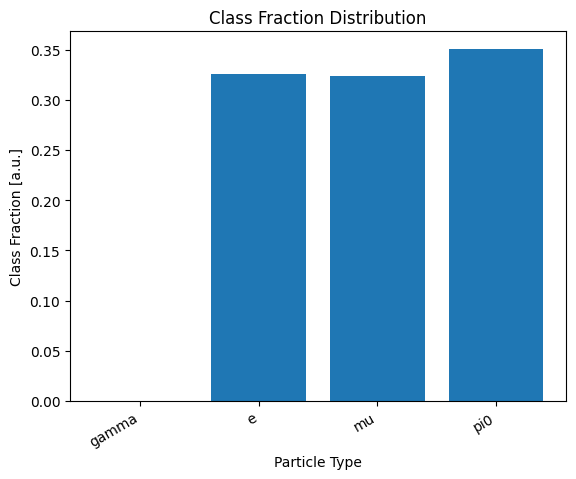

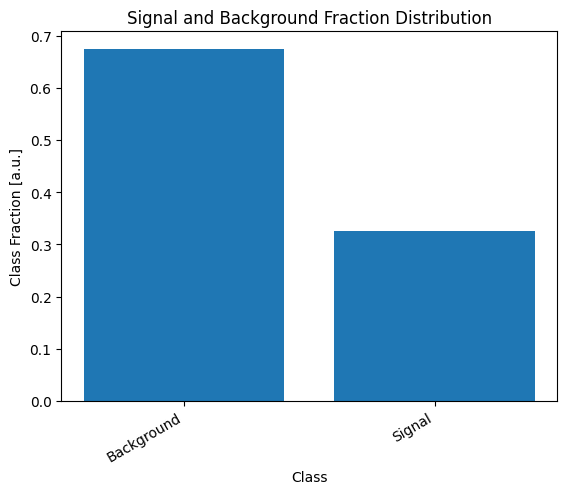

 The best threshold is : 0.4909090909090909


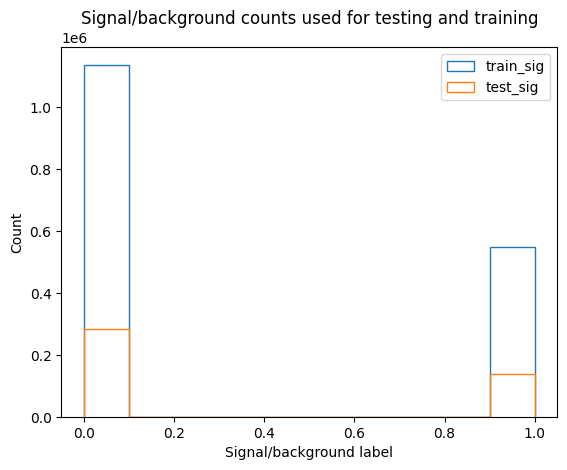

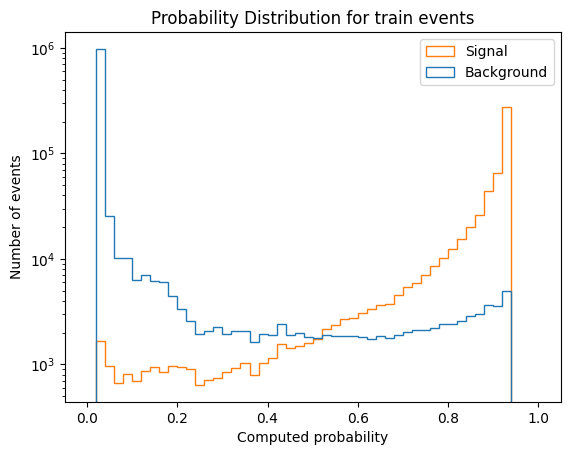

The train accuracy is:0.9546636025793355
The train f1 is:0.9322232504050686
The train precision is:0.9084452905416961
The train recall is:0.9572794113631523


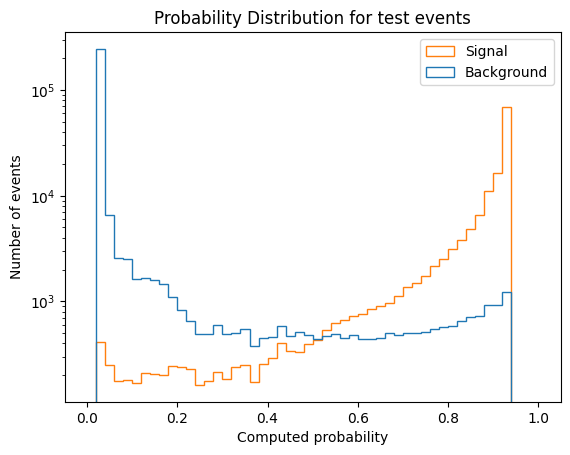

The test accuracy is:0.9549969169473035
The test f1 is:0.9326174649167661
The test precision is:0.9083551798795039
The test recall is:0.9582114165213393
{'pi0/e_likelihood ratio': 1.5140400804022684e-06, 'reco_electron_mom': 0.00019309850963126498, 'reco_electron_dwall': 4.3929980708293165e-06, 'pe': 0.9484966983437101, 'pmu': 0.003414123217392686, 'ppi0': 0.04615589454983631, 'pi0_mass': 0.0017315614657497395, 'e/mu_likelihood ratio': 1.0614081971553377e-06, 'reco_electron_towall': 1.655467331579135e-06}


/home/surajrai1900/IWCD_ParticleGun-analysis/Classification_model.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name + '_sig'] = 0


<Figure size 640x480 with 0 Axes>

In [10]:
run_model(df_base, train_col=['pi0/e_likelihood ratio', 'reco_electron_mom', 'reco_electron_dwall', 'pe', 'pmu', 'ppi0',
                              'pi0_mass', 'e/mu_likelihood ratio','reco_electron_towall', 'true_sig'], train_labels = [1, 2,  3])

In [11]:
gbdt_cuts = (df_base['gbdt_sig'].astype(bool))

In [12]:
print(f' Selection Efficiency and background rejection for fitqun cuts is : {utils.sg_eff(df_base, fq_cuts, 1)} , {utils.bg_rej(df_base, fq_cuts, [2, 3])}')
print(f' Selection Efficiency and background rejection for softmax cuts is : {utils.sg_eff(df_base, ml_cuts, 1)} , {utils.bg_rej(df_base, ml_cuts, [2, 3])}')
print(f" Selection Efficiency and background rejection for gbdt cuts is : {utils.sg_eff(df_base, gbdt_cuts, 1)} , {utils.bg_rej(df_base, gbdt_cuts, [2, 3])}")

 Selection Efficiency and background rejection for fitqun cuts is : 0.6752080468076179 , 0.8986990756108676
 Selection Efficiency and background rejection for softmax cuts is : 0.9513683302641087 , 0.9540731071965073
 Selection Efficiency and background rejection for gbdt cuts is : 0.9574655003613138 , 0.9534099156628539


In [13]:
print(f'Precision, recall and f1_score for fitqun cuts is : {utils.f1(df_base, fq_cuts, 1, [2, 3])}')
print(f'Precision, recall and f1_score for softmax cuts is : {utils.f1(df_base, ml_cuts, 1, [2, 3])}')
print(f'Precision, recall and f1_score for gbdt cuts is : {utils.f1(df_base, gbdt_cuts, 1, [2, 3])}')

Precision, recall and f1_score for fitqun cuts is : (0.7628927411509269, 0.6752080468076179, 0.7163772135991289)
Precision, recall and f1_score for softmax cuts is : (0.909086352929384, 0.9513683302641087, 0.9297468768954332)
Precision, recall and f1_score for gbdt cuts is : (0.9084272831321637, 0.9574655003613138, 0.9323019959994893)


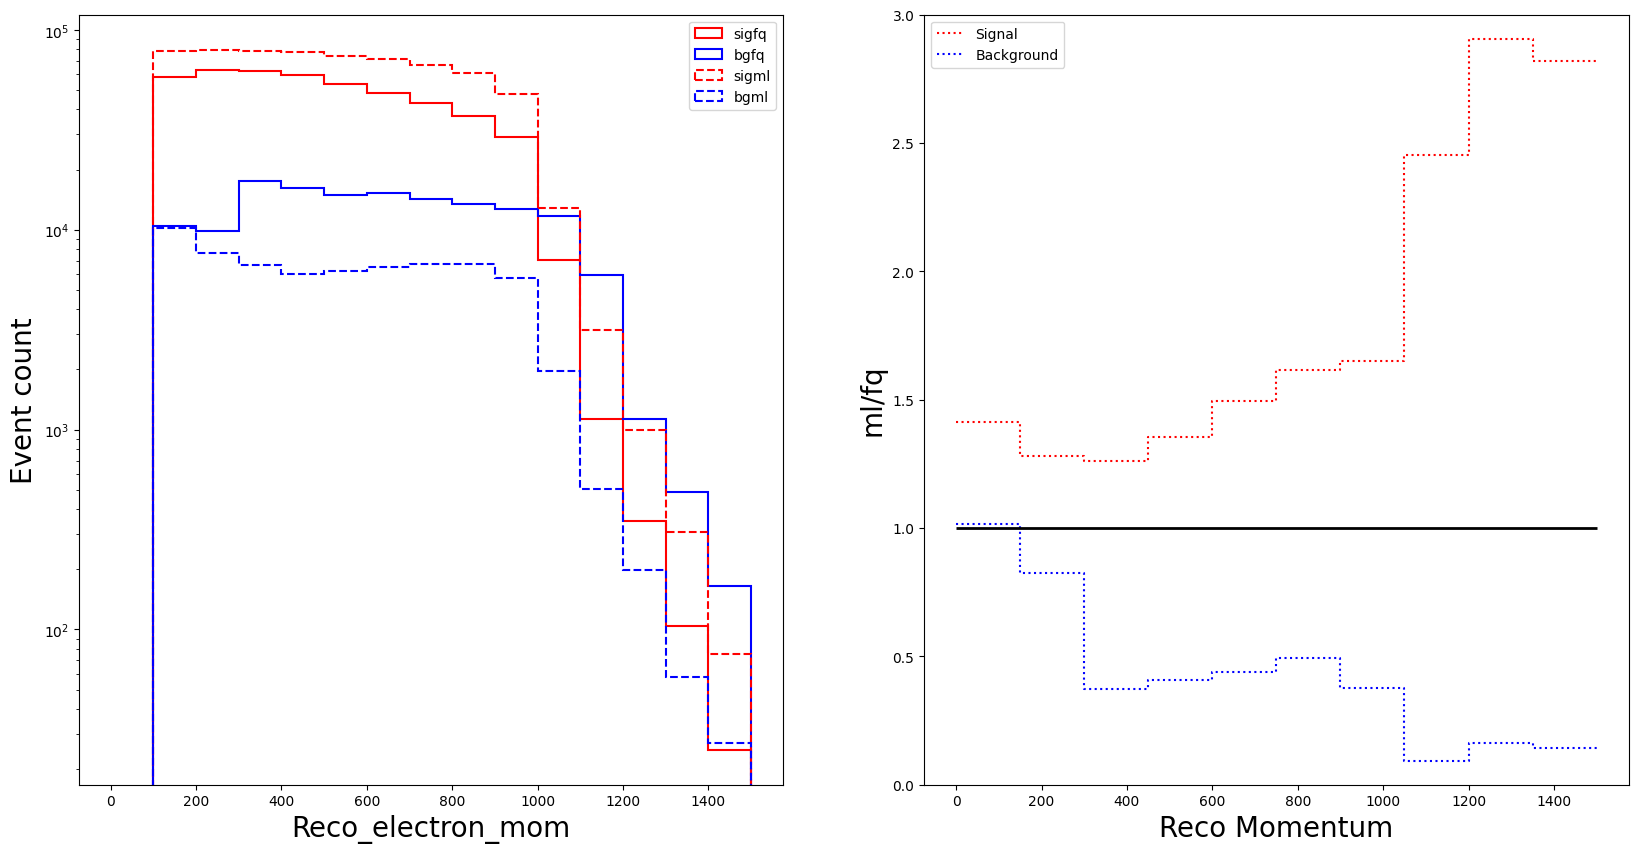

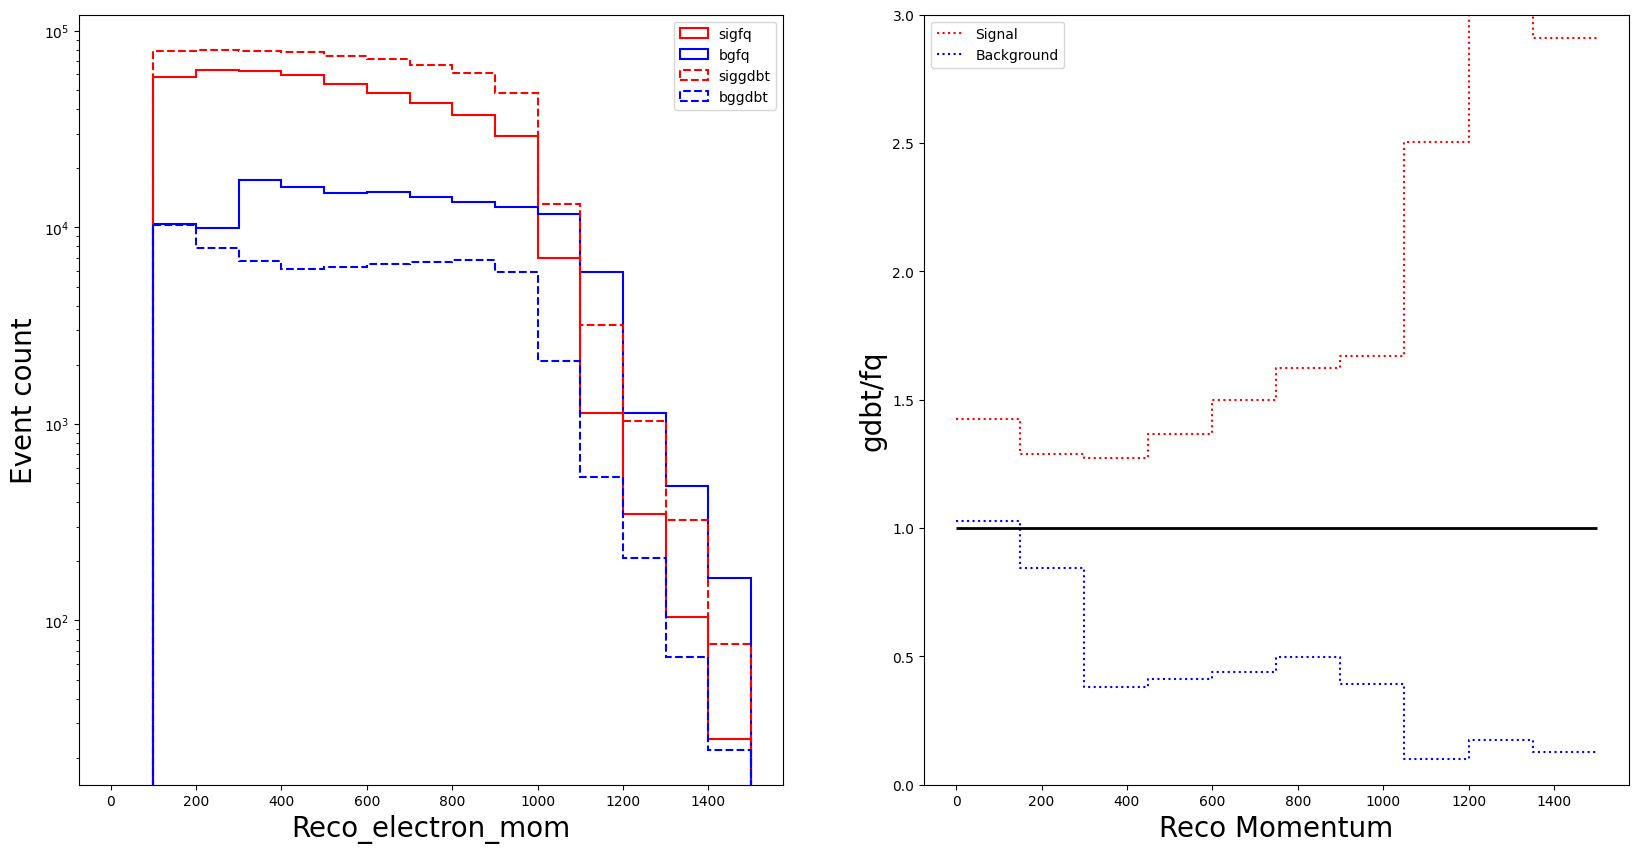

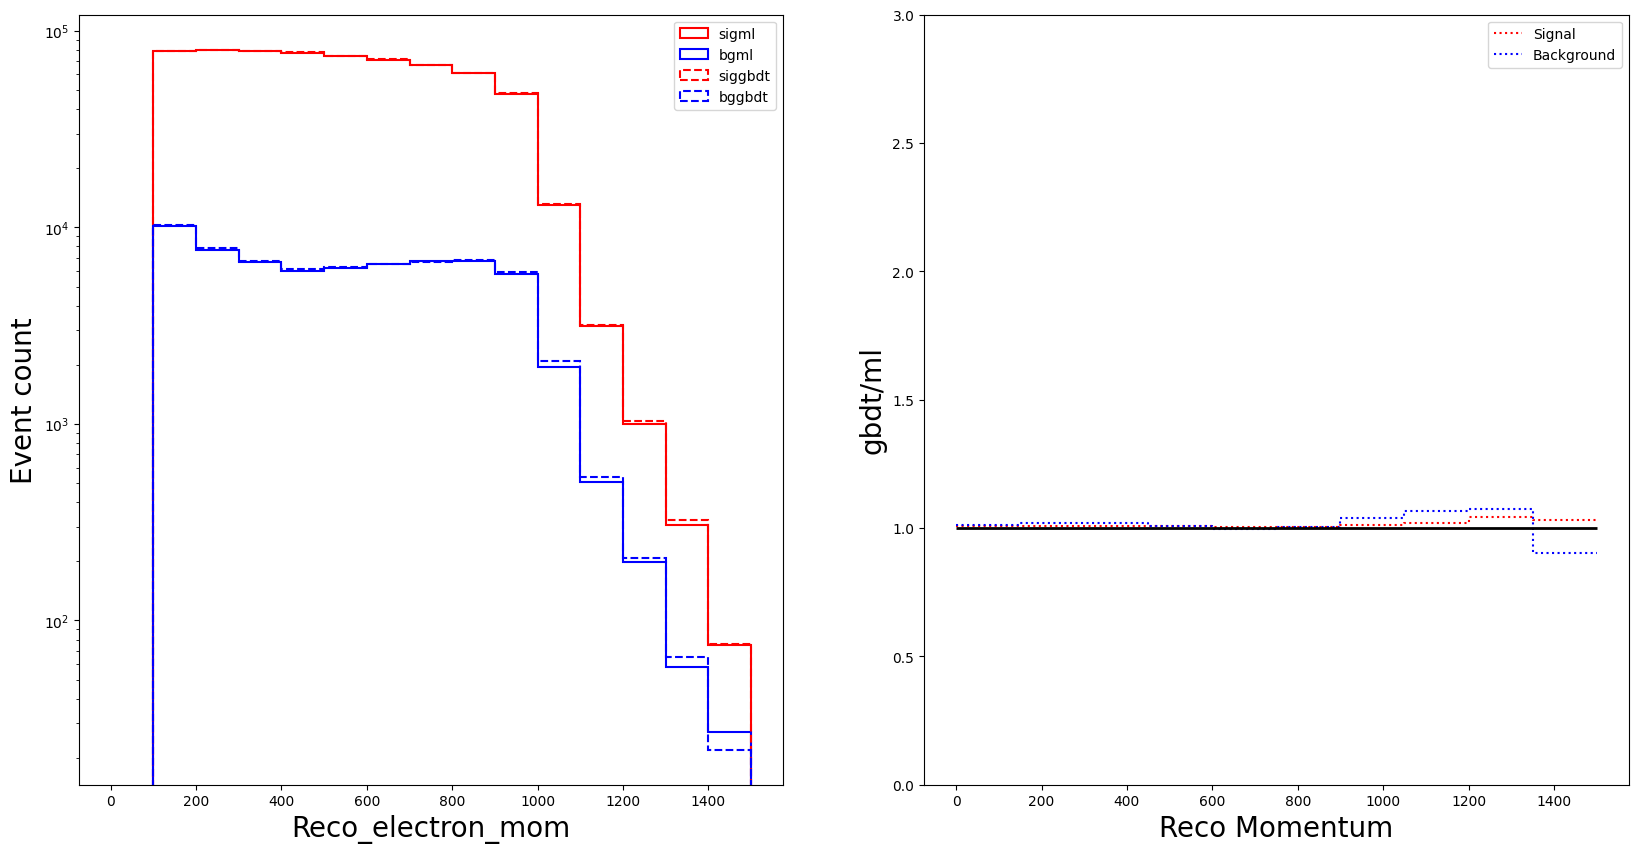

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot: xlabel='Reco_electron_mom', ylabel='Event count'>,
        <AxesSubplot: xlabel='Reco Momentum', ylabel='gbdt/ml'>],
       dtype=object))

In [14]:
utils.plot_sel_comp(df_base, 1, [2, 3], fq_cuts, ml_cuts, 'fq', 'ml')
utils.plot_sel_comp(df_base, 1, [2, 3], fq_cuts, gbdt_cuts, 'fq', 'gdbt')
utils.plot_sel_comp(df_base, 1, [2, 3], ml_cuts, gbdt_cuts, 'ml', 'gbdt')